In [1]:
# loading modules for creating models (Tensorflow/Keras Framework)
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [2]:
# Loading pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True)

# Free pre-trained layers
for param in alexnet.parameters():
    param.requires_grad = False

c:\Users\Rizwan\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rizwan\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# Mofidying final layer - classifier
num_classes = 8
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)

In [4]:
# Defining transofrmations of images
transform = transforms.Compose([
    transforms.Resize((227,227)), # Resize to input size of AlexNet
    transforms.ToTensor(), # Convert image to PyTorch Tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet statistics
])

In [6]:
train_dataset = datasets.ImageFolder(root=r'..\data\train_set', transform=transform)
test_dataset = datasets.ImageFolder(root=r'..\data\test_set', transform=transform)

# Create data loaders to batch the data and shuffle it during training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [7]:
# Setting up loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet.classifier[6].parameters(), lr=0.001) # Optimizer for training the classifying layer

In [9]:
num_epochs = 10

for epoch in range(num_epochs):
    alexnet.train() # Sets model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad() # Clears previous gradients
        outputs = alexnet(inputs) # Forward pass : compute the model output
        loss = criterion(outputs, labels) # Compute the loss
        loss.backward() # Backward pass : Compute gradients
        optimizer.step() # Update model weights

        running_loss += loss.item() # Accumulate loss for reporting
    
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

Epoch 1, Loss: 0.35979492756827125
Epoch 2, Loss: 0.22807887324999118
Epoch 3, Loss: 0.17360469236456114
Epoch 4, Loss: 0.13543009501079034
Epoch 5, Loss: 0.11483474062948391
Epoch 6, Loss: 0.08929663575414953
Epoch 7, Loss: 0.07465894083524573
Epoch 8, Loss: 0.075894292572449
Epoch 9, Loss: 0.05817364753577216
Epoch 10, Loss: 0.050236481530912994


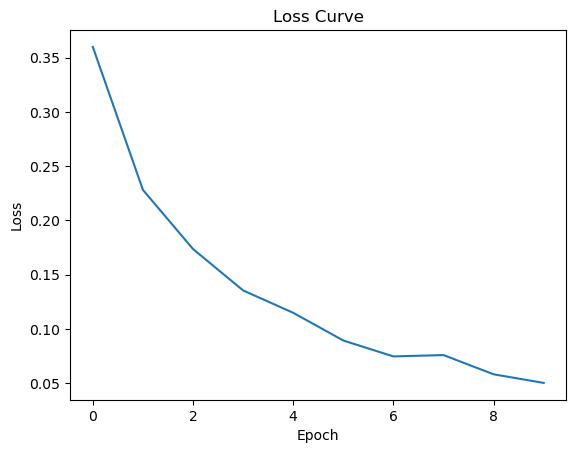

In [16]:
epoch = list(range(10))
losses = [0.35979492756827125, 0.22807887324999118, 0.17360469236456114, 0.13543009501079034, 0.11483474062948391, 0.08929663575414953, 0.07465894083524573, 0.075894292572449, 0.05817364753577216, 0.050236481530912994]

import matplotlib.pyplot as plt
plt.plot(epoch,losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [10]:
alexnet.eval()  # Set the model to evaluation mode (no dropout, no gradient computation)
correct = 0
total = 0

with torch.no_grad():  # No need to calculate gradients during evaluation
    for inputs, labels in test_loader:
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        
print(f'Accuracy: {100 * correct / total}%')

Accuracy: 95.2991452991453%


In [11]:
with torch.no_grad():  # No need to calculate gradients during evaluation
    for inputs, labels in train_loader:
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 99.0509059534081%
